## Problem Statement

By using the patient records to determine which patients have liver disease and which ones do not.

**Context**
- Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, 
intake of contaminated food, pickles and drugs. 
- This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.


**Content**
- This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. 
- The "Target" column is a class label used to divide groups into liver patients (liver disease) or not (no disease).
- This data set contains 441 male patient records and 142 female patient records.
- Any patient whose age exceeded 89 is listed as being of age "90".

## Domain Analysis

**Age of the patient**

**Gender of the patient**

**Total Bilirubin**
Bilirubin is an orange-yellow pigment that occurs normally when part of your red blood cells break down. A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease.

**Direct Bilirubin**
Bilirubin attached by the liver to glucuronic acid, a glucose-derived acid, is called direct or conjugated, bilirubin. Bilirubin not attached to glucuronic acid is called indirect

**Alkaline Phosphatase**
Alkaline phosphatase (ALP) is an enzyme in a person’s blood that helps break down proteins. Using an ALP test, it is possible to measure how much of this enzyme is circulating in a person’s blood.

**Alamine Aminotransferase**
Alanine aminotransferase (ALT) is an enzyme found primarily in the liver and kidney. ALT is increased with liver damage and is used to screen for and/or monitor liver disease.

**Aspartate Aminotransferase**
AST (aspartate aminotransferase) is an enzyme that is found mostly in the liver, but also in muscles. When your liver is damaged, it releases AST into your bloodstream. An AST blood test measures the amount of AST in your blood. The test can help your health care provider diagnose liver damage or disease.

**Total Proteins**
**Albumin and globulin** are two types of protein in your body. The total protein test measures the total amount of albumin and globulin in your body.

**Albumin**
**Albumin and Globulin Ratio**

In [73]:
import pandas as pd
import numpy as np

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [75]:
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv', header=None)

In [76]:
df.sample(4)

,0,1,2,3,4,5,6,7,8,9,10
400,66,Female,0.7,0.2,162,24,20,6.4,3.2,1.00,2
427,65,Male,0.9,0.2,170,33,66,7.0,3.0,0.75,1
356,33,Male,0.7,0.2,256,21,30,8.5,3.9,0.80,1
470,66,Male,1.1,0.5,167,13,56,7.1,4.1,1.36,1


In [77]:
column_names = 'Age, Gender, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_Globulin_Ratio, Target'

In [78]:
column_names = column_names.lstrip().split(', ')

In [79]:
# since data doesn't have column names, we are assigning them.

df.columns = column_names

In [80]:
df.shape

(583, 11)

In [81]:
df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


## Task 1:-Prepare a complete data analysis report on the given data.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_Globulin_Ratio      579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


- There are 583 observations starting from 0 to 582
- From above information, we can understand that, all the data types are according to the data, and not many null vlaues are present except for
the 'Albumin_Globulin_Ration' column
- We might convert the gender data type categorical to numerical as we proceed further.

In [83]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [84]:
df.isnull().sum()

# Albumin_globulin_ratio has 4 missing values, we will impute them going further.

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_Globulin_Ratio        4
Target                        0
dtype: int64

In [85]:
# Mean & Median of "Albumin_and_Globulin_Ratio" feature:
print(df['Albumin_Globulin_Ratio'].median())
print(df['Albumin_Globulin_Ratio'].mean())

0.93
0.9470639032815197


In [86]:
# Filling NaN Values of "Albumin_Globulin_Ratio" feature with Median :
df['Albumin_Globulin_Ratio'] = df['Albumin_Globulin_Ratio'].fillna(df['Albumin_Globulin_Ratio'].median())

In [87]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_Globulin_Ratio        0
Target                        0
dtype: int64

In [88]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_Globulin_Ratio        float64
Target                          int64
dtype: object

In [89]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


* There are no constant values
* Average age is 45
* the minimum Total Protein in the patiens is 3, Max is 10.

In [90]:
df['Target'].value_counts()

Target
1    416
2    167
Name: count, dtype: int64

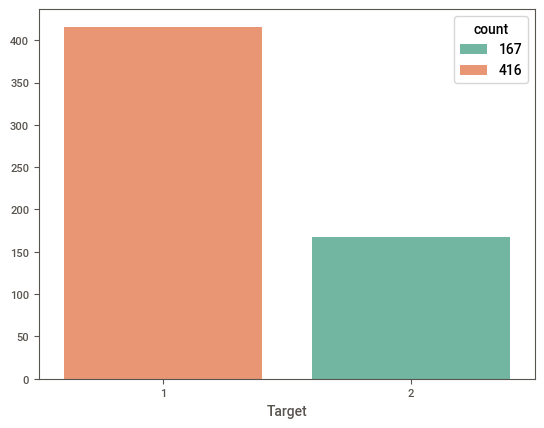

In [91]:
sns.barplot(x=df['Target'].value_counts().index, y=df['Target'].value_counts().values, hue=df['Target'].value_counts(), palette='Set2')
plt.show()

* This plot clearly shows that the data has Imbalance in the Target variable.
* We might need to apply some techniques like SMOTE to over come this problem later on.

In [92]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_Globulin_Ratio', 'Target'],
      dtype='object')

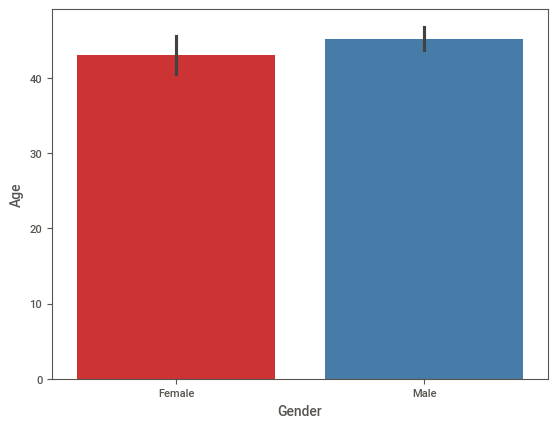

In [93]:
sns.barplot(y=df['Age'], x=df['Gender'], hue=df['Gender'], palette='Set1', legend=False)
plt.show()

In the above plot we con conclude that few Male patients are bit older than 40

In [13]:
import sweetviz
sv = sweetviz.analyze(df)
sv.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Summary:

1. **Dataset Overview**

- The dataset consists of 583 records with 11 features, focusing on liver function tests, patient demographics, and a target variable indicating liver disease presence.

- There are 13 duplicate records identified, which may need to be handled depending on the analysis goals.
- The dataset features a mix of categorical and numerical data.

2. **Demographic Distribution**
   
**Age:** The dataset covers a broad age range, from 4 to 90 years, with a mean age around 45 years. There is a significant variance, indicating diverse age groups are represented.

**Gender:** The data includes both male and female patients, with no missing values, ensuring balanced demographic representation.

3. **Liver Function Test Analysis**
   
**Key Liver Enzymes and Markers:** The report details several liver function tests, including Alanine Aminotransferase (ALT), Aspartate Aminotransferase (AST), Albumin, and Bilirubin.

**Distributions:** Many of these variables exhibit high skewness and kurtosis, suggesting the presence of outliers or non-normal distributions. This is common in medical datasets where extreme values might indicate severe disease cases.

**Statistical Measures:** For example, the ALT levels have a wide range, with an Interquartile Range (IQR) indicating the middle 50% of data, and the Standard Deviation (STD) showing considerable spread.

4. **Correlation and Feature Importance**
   
**Correlation Analysis:** The report includes a correlation matrix, visualized with a heatmap, to show the relationships between various features. Strong correlations indicate redundant features or important relationships that could inform predictive modeling.

**Feature Importance:** The analysis probably ranks features by their importance in predicting liver disease, based on statistical methods or machine learning models.

5. **Target Variable Analysis**
   
The target variable is binary, indicating the presence or absence of liver disease. The distribution shows 71% of cases with liver disease and 29% without, which is important for understanding class imbalance in the dataset.

6. **Statistical Summary**
   
Each feature's distribution is summarized with key statistics like mean, median, standard deviation, and skewness. These help in understanding the central tendency, variability, and shape of the data distributions.

In [94]:
# Gender feature is categorical, converting it to numerical, For Male = 1, Female = 0

df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

In [95]:
df.sample(6)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
497,67,1,2.2,1.1,198,42,39,7.2,3.0,0.70,1
145,65,1,0.8,0.2,201,18,22,5.4,2.9,1.10,2
200,49,1,0.6,0.1,218,50,53,5.0,2.4,0.90,1
124,28,1,0.6,0.1,177,36,29,6.9,4.1,1.40,2
264,38,1,0.8,0.2,247,55,92,7.4,4.3,1.38,2
355,19,1,1.4,0.8,178,13,26,8.0,4.6,1.30,2


In [96]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.215968,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003184,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206015,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199850,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233784,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002254,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069930,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233828,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686091,0.161388
Albumin_Globulin_Ratio,-0.215968,-0.003184,-0.206015,-0.199850,-0.233784,-0.002254,-0.069930,0.233828,0.686091,1.000000,0.162144


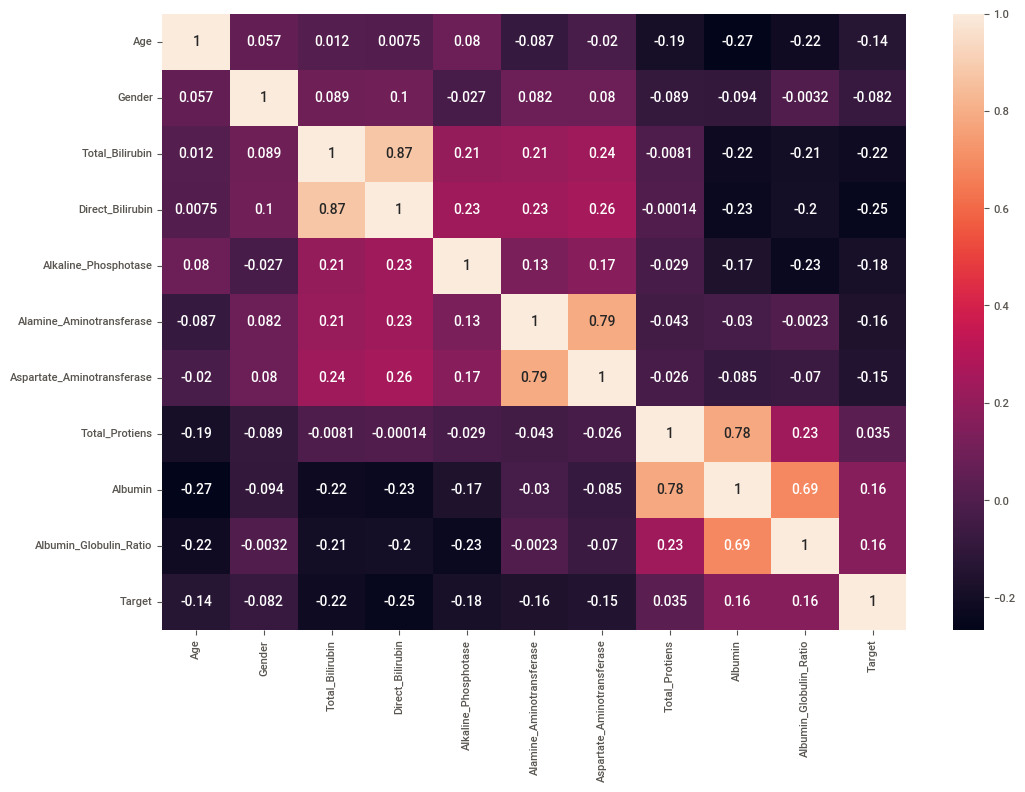

In [97]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

Multicollinearity between

**'Total_Bilirubin'** and **'Direct_Bilirubin'** is **0.87%**

**'Alamine_Aminotransferase'** and **'Aspartate_Aminotransferase' **is **0.79%**

**'Total_Protiens'** and **'Albumin'** is **0.78%**

**'Albumin'** and **'Albumin_and_Globulin_Ratio'** is **0.69%**

The highest correlation is between total_bilirubin and direct_bilirubin, since we consider 85% and above as the threshold for multicollinearity
we are dropping one of the Predictor/Feature.

In [98]:
df.drop('Direct_Bilirubin',axis= 1,inplace= True)

In [99]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_Globulin_Ratio', 'Target'],
      dtype='object')

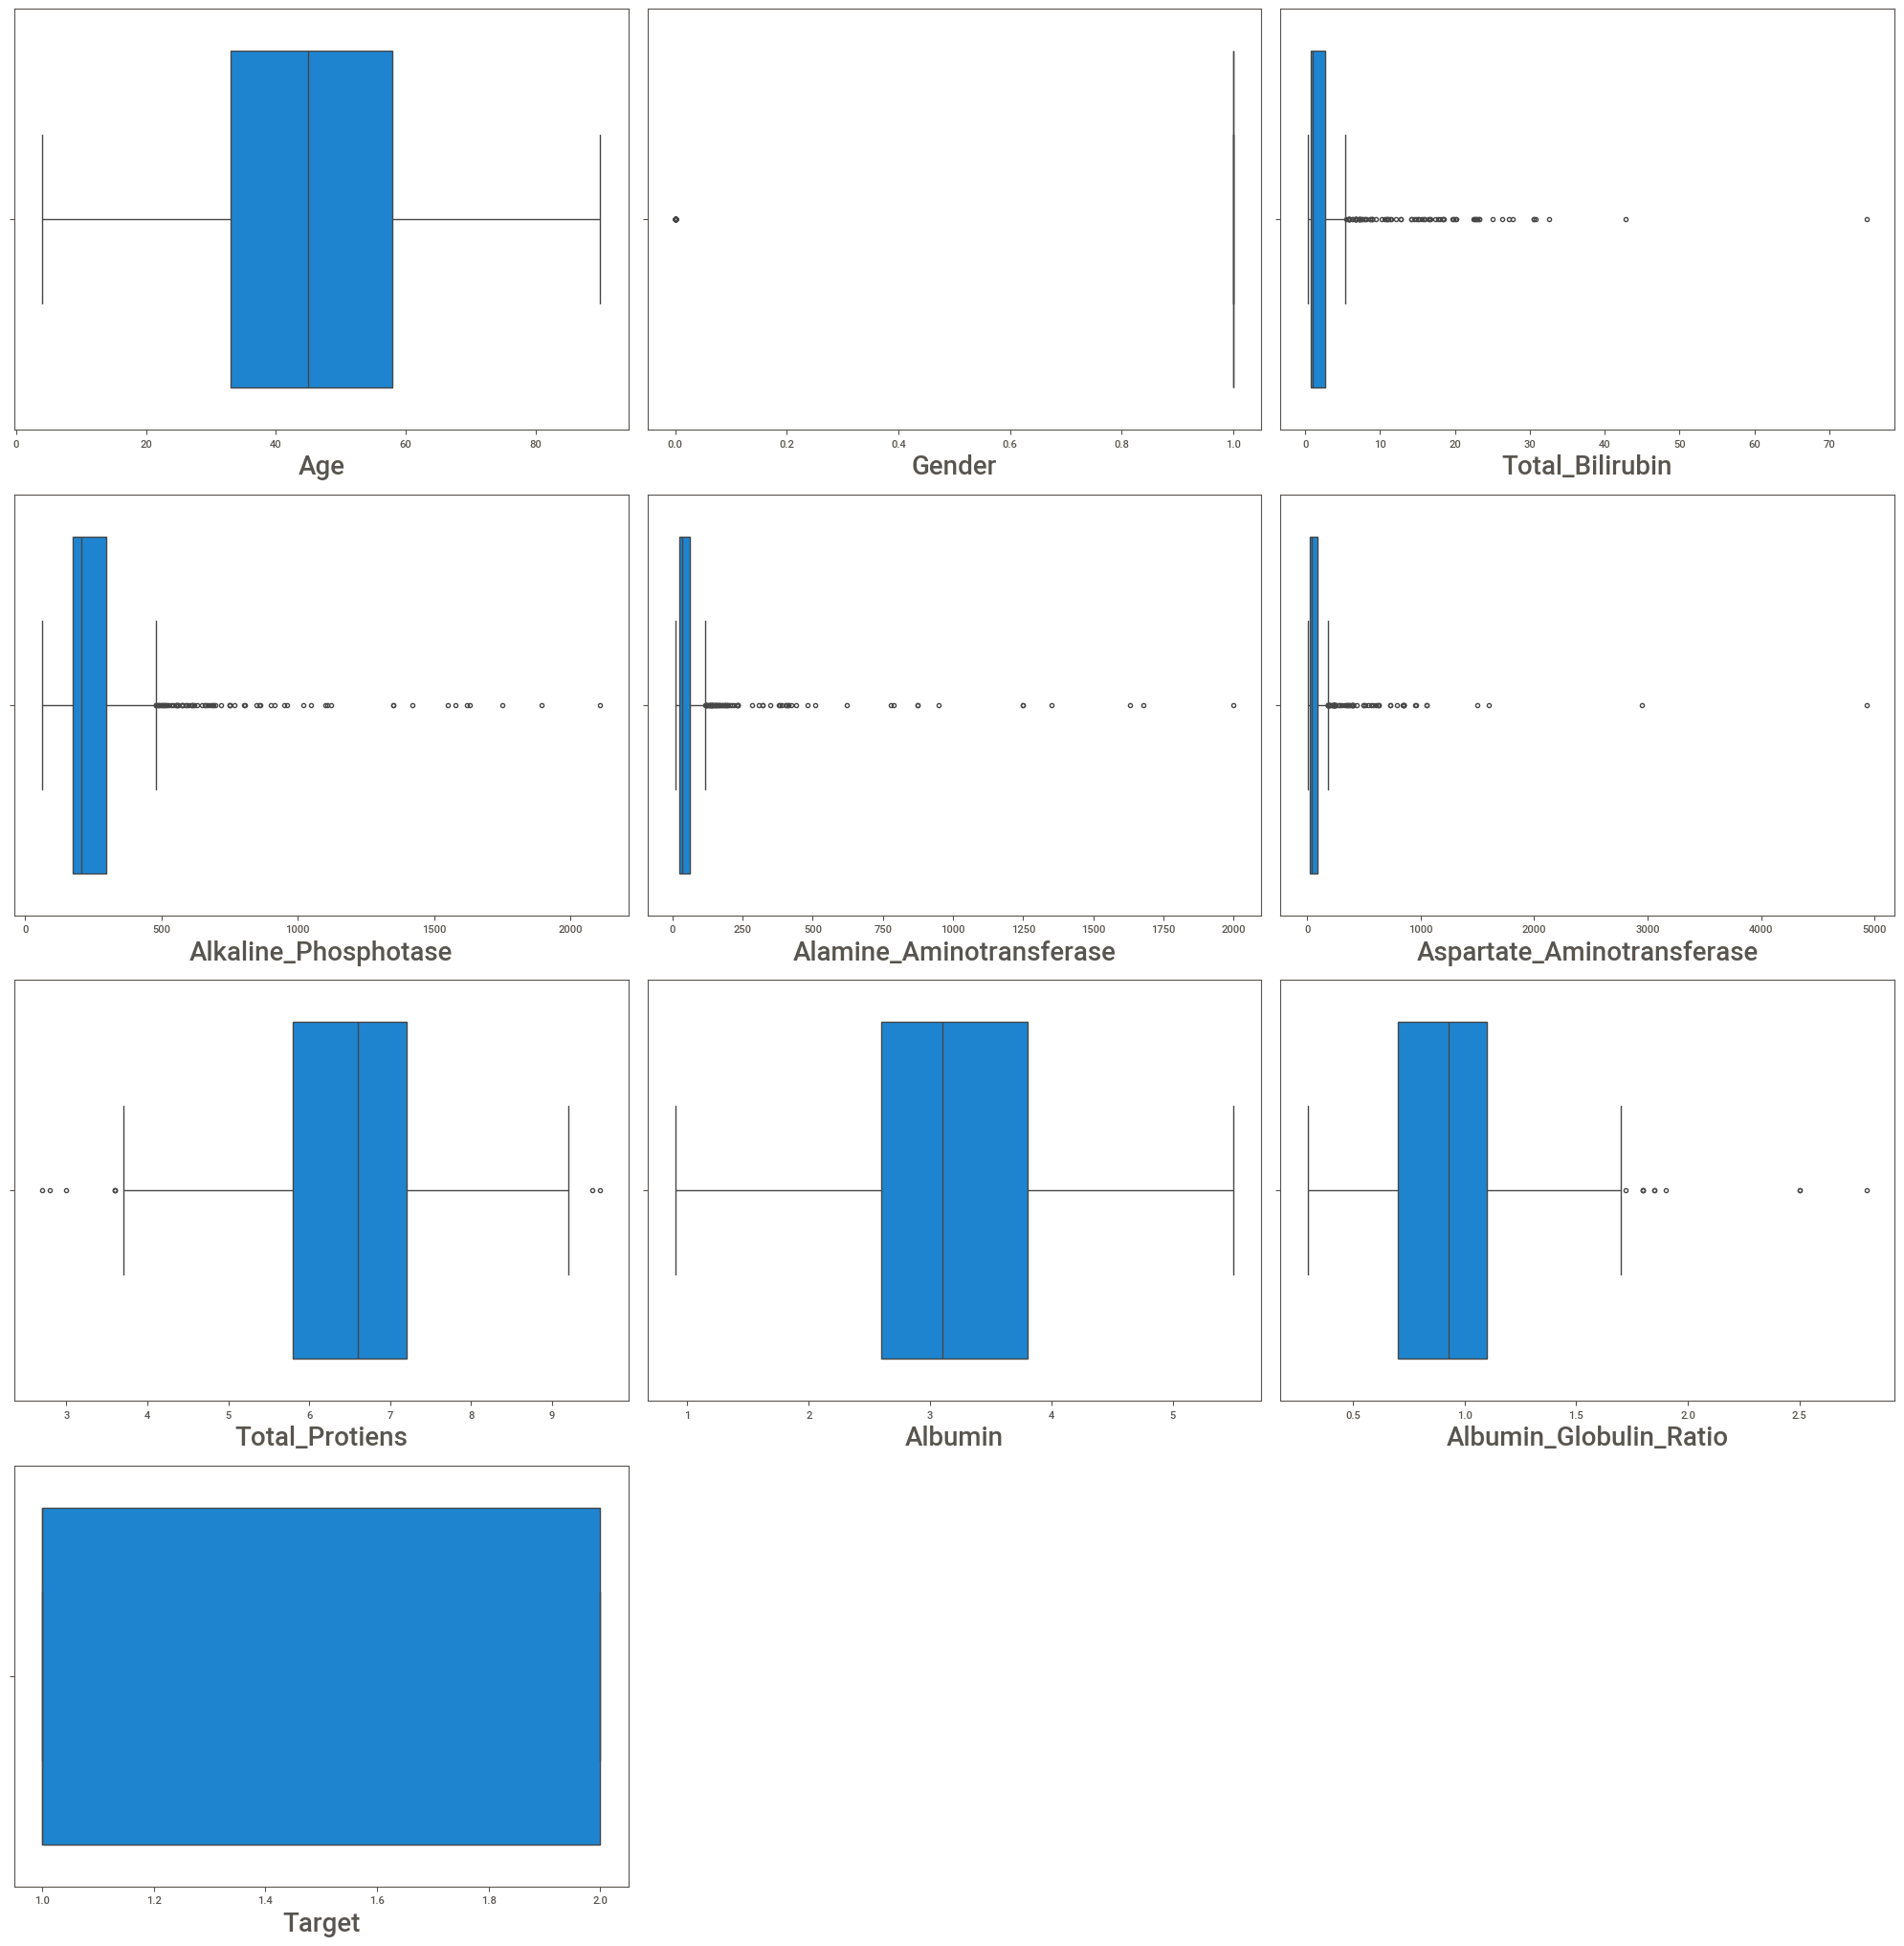

In [100]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in df: # iteration of columns / acessing the columns from  dataset 
    if plotno<=16:    # set the limit
        plt.subplot(5,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.boxplot(x=df[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

Total_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens,
Albumin_Globulin_Ratio have outliers, to make sure the percentage and the upper and lower limit we are going to use IQR method

**Benefits of Capping**

**Mitigates the Impact of Outliers:** By bringing extreme values closer to the central tendency, capping can reduce the skewness in the data and lessen the influence of outliers on statistical analyses.

**Preserves Data Structure:** Unlike removing outliers, capping retains all data points but adjusts extreme values, which can be useful in maintaining the dataset's overall structure and size.

**Simpler than Imputation:** For some datasets, capping may be simpler and more straightforward than imputation, especially when you have a clear idea of what constitutes extreme values.

In [101]:
column_outlier = ['Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 
                 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin_Globulin_Ratio']

for column in column_outlier:
    # Define capping limits using quartiles
    lower_limit = df[column].quantile(0.25)  # 1st quartile (Q1)
    upper_limit = df[column].quantile(0.75)  # 3rd quartile (Q3)
    
    # Apply capping
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)


In [102]:
df.sample(6)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
238,35,0,0.9,190.0,40.0,35,7.2,4.7,1.1,2
172,55,1,2.6,298.0,35.0,63,5.8,1.6,0.7,1
466,28,0,0.8,175.5,23.0,25,5.8,1.9,0.7,2
5,46,1,1.8,208.0,23.0,25,7.2,4.4,1.1,1
387,51,1,0.8,175.5,34.0,25,6.9,3.7,1.1,1
321,30,0,0.8,198.0,30.0,58,5.8,2.8,1.1,1


In [103]:
df.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,1.465866,228.531732,39.500858,50.975986,6.514408,3.141852,0.914443,1.286449
std,16.189833,0.429603,0.762446,50.780077,15.376224,25.305816,0.577765,0.795519,0.159577,0.452490
min,4.000000,0.000000,0.800000,175.500000,23.000000,25.000000,5.800000,0.900000,0.700000,1.000000
25%,33.000000,1.000000,0.800000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,298.000000,60.250000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,2.600000,298.000000,60.500000,87.000000,7.200000,5.500000,1.100000,2.000000


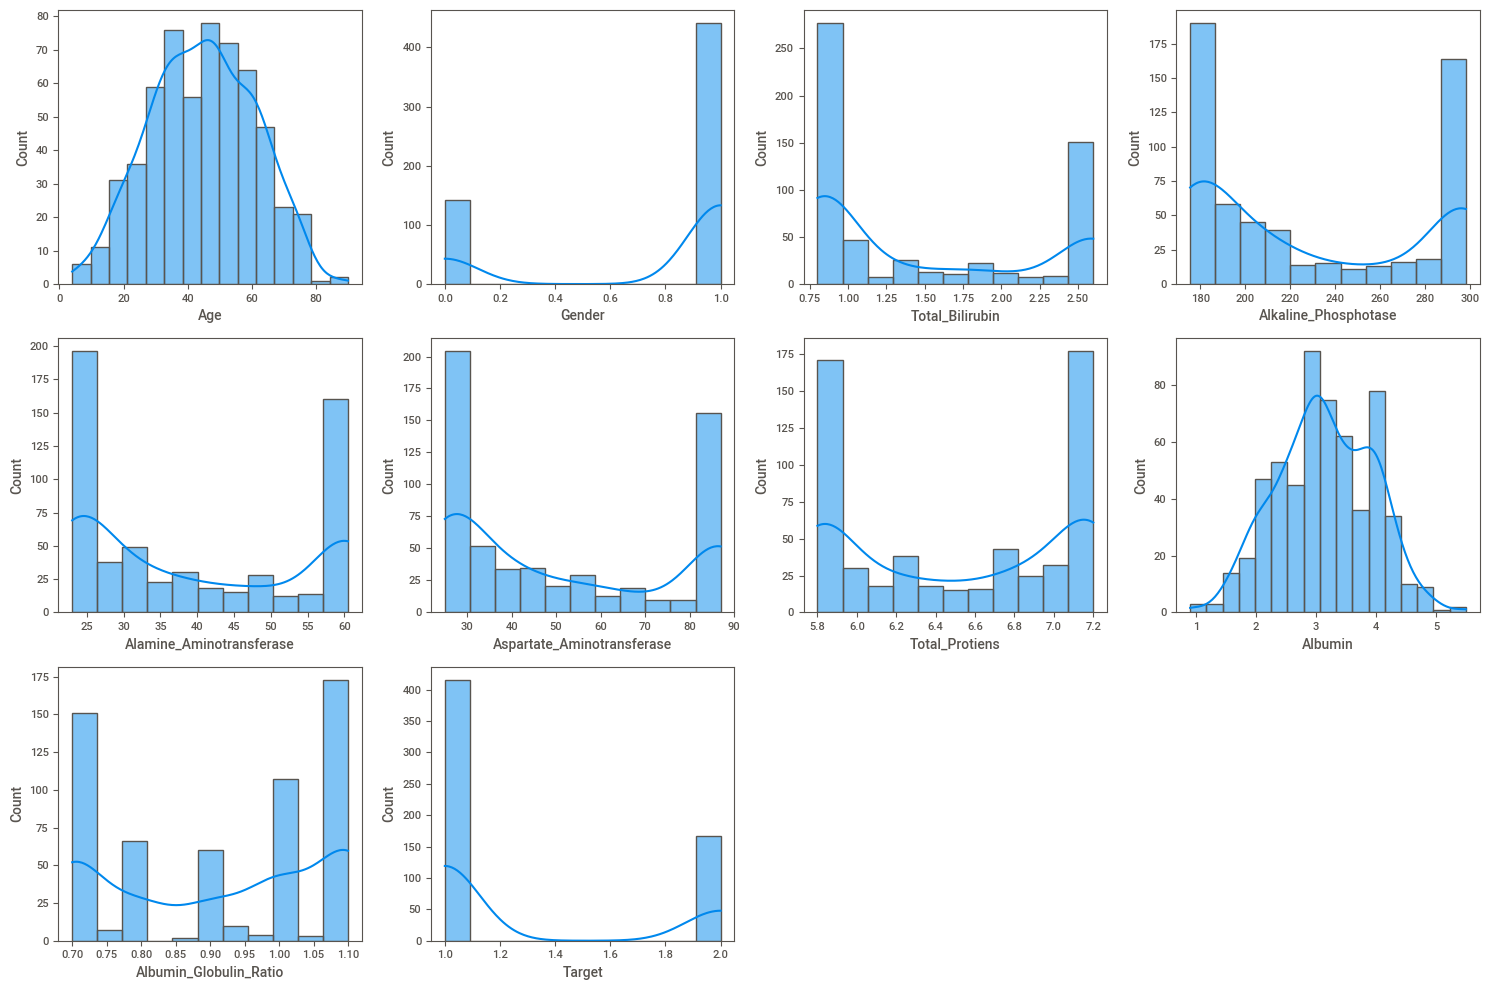

In [104]:
plt.figure(figsize=(15, 10))
plt_num = 1

for column in df:
    plt.subplot(3, 4, plt_num)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column, fontsize=10)
    plt.tight_layout()
    plt_num += 1
plt.show()

Since the distribution aren't normally distributed, we apply MinMax scalar to the data to normalize them.

In [105]:
df.drop_duplicates(inplace=True)

## Splitting the data into Train and Test

In [106]:
X = df.iloc[:, :-1]
y = df.loc[:,'Target']
X.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio
0,65,0,0.8,187.0,23.0,25,6.8,3.3,0.90
1,62,1,2.6,298.0,60.5,87,7.2,3.2,0.74
2,62,1,2.6,298.0,60.0,68,7.0,3.3,0.89
3,58,1,1.0,182.0,23.0,25,6.8,3.4,1.00
4,72,1,2.6,195.0,27.0,59,7.2,2.4,0.70


In [107]:
# splitting the data into train, test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Task 2:-Create a predictive model with implementation of  different classifiers on liver patient diseases dataset to predict liver diseases.

## Model Building

In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score

In [110]:
rf, svc, lr, dt = RandomForestClassifier(), LogisticRegression(), SVC(), DecisionTreeClassifier()

In [111]:
for i in [lr, dt, svc, rf]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    pred_train = i.predict(x_train)
    print(f"Training on {i}")
    print("Train Accuracy Score: ", accuracy_score(pred_train, y_train))
    print("Test Accuracy Score: ", accuracy_score(pred, y_test))
    print("f1 Score:", f1_score(pred, y_test))
    print(classification_report(pred, y_test))
    print(" ")

Training on SVC()
Train Accuracy Score:  0.7096018735362998
Test Accuracy Score:  0.7202797202797203
f1 Score: 0.8373983739837398
              precision    recall  f1-score   support

           1       1.00      0.72      0.84       143
           2       0.00      0.00      0.00         0

    accuracy                           0.72       143
   macro avg       0.50      0.36      0.42       143
weighted avg       1.00      0.72      0.84       143

 
Training on DecisionTreeClassifier()
Train Accuracy Score:  1.0
Test Accuracy Score:  0.6083916083916084
f1 Score: 0.7227722772277227
              precision    recall  f1-score   support

           1       0.71      0.74      0.72        99
           2       0.35      0.32      0.33        44

    accuracy                           0.61       143
   macro avg       0.53      0.53      0.53       143
weighted avg       0.60      0.61      0.60       143

 
Training on LogisticRegression()
Train Accuracy Score:  0.7283372365339579
Tes

Both Decision Tree and Random Forest are overfitting

Since the classes are imbalanced, we are going to handle them using SMOTE technique

In [112]:
from imblearn.over_sampling import SMOTE

In [113]:
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(X,y)

In [114]:
x_train_smote.shape

(812, 9)

In [115]:
from collections import Counter
print('Before SMOTE : ', Counter(y_train))
print('After SMOTE  : ', Counter(y_train_smote))

Before SMOTE :  Counter({1: 303, 2: 124})
After SMOTE  :  Counter({1: 406, 2: 406})


In [116]:
for i in [lr, dt, svc, rf]:
    i.fit(x_train_smote, y_train_smote)
    pred = i.predict(x_test)
    pred_train = i.predict(x_train_smote)
    print(f"Training on {i}")
    print("Train Accuracy Score: ", accuracy_score(pred_train, y_train_smote))
    print("Test Accuracy Score: ", accuracy_score(pred, y_test))
    print("f1 Score:", f1_score(pred, y_test))
    print(classification_report(pred, y_test))
    print(" ")

Training on SVC()
Train Accuracy Score:  0.6970443349753694
Test Accuracy Score:  0.6573426573426573
f1 Score: 0.7262569832402235
              precision    recall  f1-score   support

           1       0.63      0.86      0.73        76
           2       0.72      0.43      0.54        67

    accuracy                           0.66       143
   macro avg       0.68      0.64      0.63       143
weighted avg       0.68      0.66      0.64       143

 
Training on DecisionTreeClassifier()
Train Accuracy Score:  1.0
Test Accuracy Score:  1.0
f1 Score: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00        40

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

 
Training on LogisticRegression()
Train Accuracy Score:  0.7229064039408867
Test Accuracy Score:  0.678321678

Both Random Forest and Decision Tree are fitting too well with the Accuracy score of 1 for both Train and Test data

In [117]:
y_test.shape

(143,)

In [118]:
pd.crosstab(pred, y_test)

Target,1,2
row_0,,
1,103,0
2,0,40


## Also training the for Gradient Boosting, Ada Boosting

In [119]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb = GradientBoost.fit(x_train_smote, y_train_smote)

# Predictions:
y_pred_grad = GradientBoost.predict(x_test)

# Performance:
print('Accuracy:', accuracy_score(y_test, y_pred_grad))
print(classification_report(y_test, y_pred_grad))

Accuracy: 0.9020979020979021
              precision    recall  f1-score   support

           1       0.93      0.93      0.93       103
           2       0.82      0.82      0.82        40

    accuracy                           0.90       143
   macro avg       0.88      0.88      0.88       143
weighted avg       0.90      0.90      0.90       143



In [120]:
pd.crosstab(y_test, y_pred_grad)

col_0,1,2
Target,,
1,96,7
2,7,33


In [121]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
ab = AdaBoost.fit(x_train_smote, y_train_smote)

# Predictions:
y_pred_ada = AdaBoost.predict(x_test)

# Performance:
print('Accuracy:', accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

Accuracy: 0.8111888111888111
              precision    recall  f1-score   support

           1       0.89      0.84      0.87       103
           2       0.64      0.72      0.68        40

    accuracy                           0.81       143
   macro avg       0.77      0.78      0.77       143
weighted avg       0.82      0.81      0.81       143



In [122]:
pd.crosstab(y_test, y_pred_ada)

col_0,1,2
Target,,
1,87,16
2,11,29


## RandomizedSearch CV

In [123]:
# Importing RandomizedSearchCV:
from sklearn.model_selection import RandomizedSearchCV

In [124]:
# Number of trees in random forest:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] 

# Number of features to consider at every split:
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree:
max_depth = [int(x) for x in np.linspace(100, 100,20)]

# Minimum number of samples required to split a node:
min_samples_split = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]

In [125]:
# Create the random grid:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20], 'criterion': ['entropy', 'gini']}


In [126]:
rf_randomcv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose = 2,
                               random_state = 0, n_jobs = -1)

# fit the randomized model:
rf_randomcv.fit(x_train_smote, y_train_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [100, 100, 100, 100, 100,
                                                      100, 100, 100, 100, 100,
                                                      100, 100, 100, 100, 100,
                                                      100, 100, 100, 100, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 12,
                                                             14, 16, 18, 20],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 12,
                                                              14, 16, 18, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=0, verbose=2)

In [127]:
# Best parameter of RandomizedSearchCV:
rf_randomcv.best_params_

{'n_estimators': 900,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'criterion': 'gini'}

In [128]:
# Creating model using best parameter of RandomizedSearchCV:
random_rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 500, max_depth = 100, max_features = 'sqrt',
                                               min_samples_split = 8, min_samples_leaf = 2)

rf_randomcv = random_rf.fit(x_train_smote, y_train_smote)

# Predictions:
y_pred_rf = rf_randomcv.predict(x_test)

# Performance:
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.951048951048951
              precision    recall  f1-score   support

           1       0.96      0.97      0.97       103
           2       0.92      0.90      0.91        40

    accuracy                           0.95       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.95      0.95      0.95       143



In [129]:
pd.crosstab(y_test, y_pred_rf)

col_0,1,2
Target,,
1,100,3
2,4,36


There are only 6 misclassifed, thus this model is better.

## Task3:- Create an analysis to show on what basis you have designed your model.

Based on the above Models the Random Forset and Decision Tree gives 100% accuracy on both training and testing dataset.
However since the is very small and we we select Random Forest with 100% accuracy, the model might overfit for the new dataset.

Hence, the Random Forest after RandomSearchCV optimizer, the results are promising and generalized model with accuracy 95% and f1 Score 97% so We are using that model for Deployment.

In [130]:
for i in [rf, gb, ab, dt, lr]:
    predict = i.fit(x_train_smote, y_train_smote)
    y_hat = predict.predict(x_test)
    print("Accuracy Score for {}: {}".format(i, accuracy_score(y_hat, y_test)))
    print("f1 Score", f1_score(y_hat, y_test))
    print(" ")

Accuracy Score for RandomForestClassifier(): 1.0
f1 Score 1.0
 
Accuracy Score for GradientBoostingClassifier(): 0.9090909090909091
f1 Score 0.9371980676328503
 
Accuracy Score for AdaBoostClassifier(): 0.8111888111888111
f1 Score 0.8656716417910447
 
Accuracy Score for DecisionTreeClassifier(): 1.0
f1 Score 1.0
 
Accuracy Score for SVC(): 0.6573426573426573
f1 Score 0.7262569832402235
 


After checking all the model and analizing the results like Accuracy and f1 Score, RandomizedSearchCV with Random Forest gives best results.

## Saving a file for Deployment

In [131]:
# Creating a pickle file for the classifier
import pickle
filename = 'Liver.pkl'
pickle.dump(RandomForestClassifier, open(filename, 'wb'))